In [15]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [16]:
df=sns.load_dataset("titanic")

In [17]:
# 1. How big is the data?
df.shape

(891, 15)

In [18]:
# 2. How does the data look like?
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
637,0,2,male,31.0,1,1,26.2500,S,Second,man,True,NaN,Southampton,no,False
49,0,3,female,18.0,1,0,17.8000,S,Third,woman,False,NaN,Southampton,no,False
843,0,3,male,34.5,0,0,6.4375,C,Third,man,True,NaN,Cherbourg,no,True
167,0,3,female,45.0,1,4,27.9000,S,Third,woman,False,NaN,Southampton,no,False
669,1,1,female,NaN,1,0,52.0000,S,First,woman,False,C,Southampton,yes,False


In [19]:
# 3. What is the data type of cols?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [20]:
# 4. Are there any missing values?
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [21]:
# 5. How does the data look mathematically?
df.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
# 6. Are there duplicate values?
df.duplicated().sum()

107

In [23]:
# 7. How is the correlation between cols?
df.corr()['survived']

survived      1.000000
pclass       -0.338481
age          -0.077221
sibsp        -0.035322
parch         0.081629
fare          0.257307
adult_male   -0.557080
alone        -0.203367
Name: survived, dtype: float64

In [24]:
# EDA Univariate

In [25]:
# 1. Categorical Data
# a. Countplot

<AxesSubplot:xlabel='embarked', ylabel='count'>

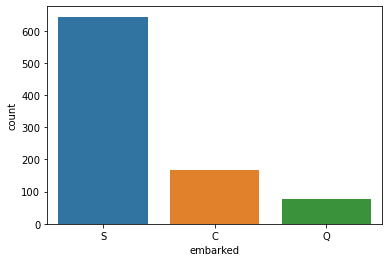

In [26]:
sns.countplot(df['embarked'])
#df['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='sex'>

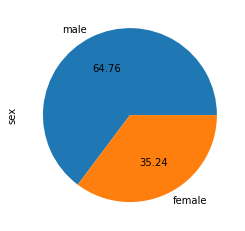

In [27]:
# b. PieChart
df['sex'].value_counts().plot(kind='pie',autopct='%.2f')

(array([100., 346., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <BarContainer object of 5 artists>)

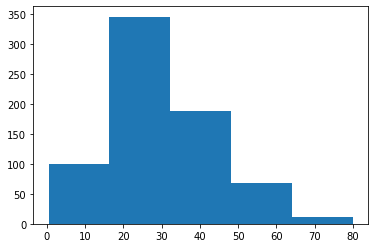

In [28]:
# 2. Numerical Data
# a. Histogram
import matplotlib.pyplot as plt
plt.hist(df['age'],bins=5)

<AxesSubplot:xlabel='age', ylabel='Density'>

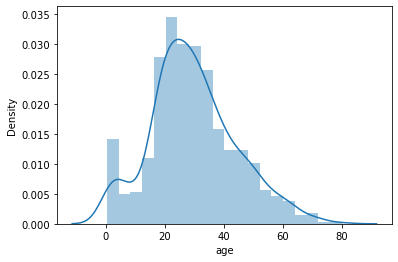

In [29]:
# b. Distplot
sns.distplot(df['age'])

<AxesSubplot:xlabel='age'>

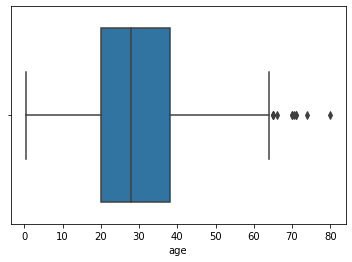

In [30]:
# c. Boxplot
sns.boxplot(df['age'])

In [31]:
df['age'].min()

0.42

In [32]:
df['age'].max()

80.0

In [33]:
df['age'].mean()

29.69911764705882

In [34]:
df['age'].skew()

0.38910778230082704

In [35]:
# Bivariate

In [36]:
tips = sns.load_dataset('tips')

In [37]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
titanic = df.copy()
flights = sns.load_dataset('flights')

In [40]:
iris = sns.load_dataset('iris')

In [42]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

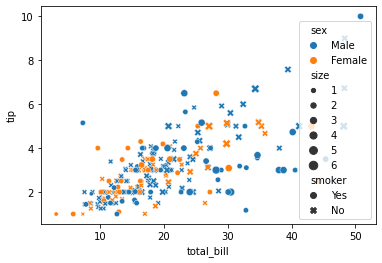

In [43]:
# 1. Scatterplot (Numerical - Numerical)
sns.scatterplot(tips['total_bill'],tips['tip'],hue=tips['sex'],style=tips['smoker'],size=tips['size'])

In [44]:
# 2. Bar Plot (Numerical - Categorical)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='pclass', ylabel='age'>

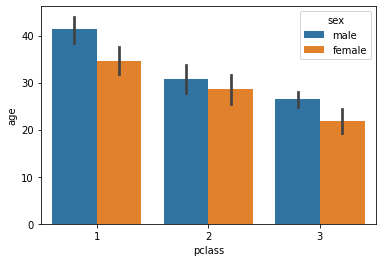

In [45]:
sns.barplot(titanic['pclass'],titanic['age'],hue=titanic['sex'])

<AxesSubplot:xlabel='sex', ylabel='age'>

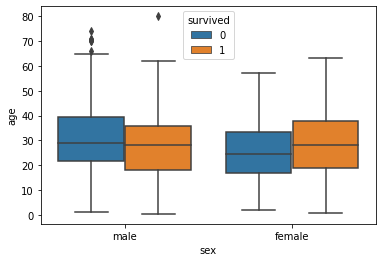

In [46]:
# 3. Box Plot (Numerical - Categorical)
sns.boxplot(titanic['sex'],titanic['age'],hue=titanic['survived'])

<AxesSubplot:xlabel='age', ylabel='Density'>

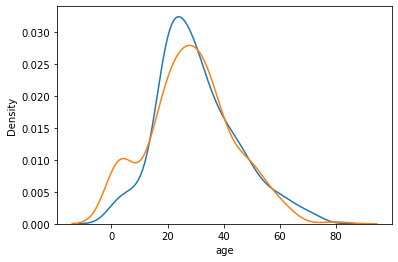

In [47]:
# 4. Distplot (Numerical - Categorical)
sns.distplot(titanic[titanic['survived']==0]['age'],hist=False)
sns.distplot(titanic[titanic['survived']==1]['age'],hist=False)

In [48]:
# 5. HeatMap (Categorical - Categorical)
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


<AxesSubplot:xlabel='survived', ylabel='pclass'>

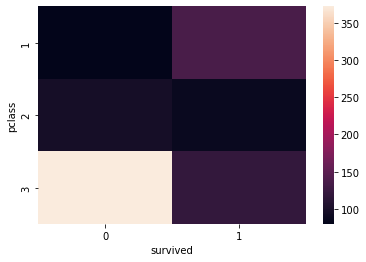

In [52]:
sns.heatmap(pd.crosstab(titanic['pclass'],titanic['survived']))

In [54]:
(titanic.groupby('embarked').mean()['survived']*100)

embarked
C    55.357143
Q    38.961039
S    33.695652
Name: survived, dtype: float64

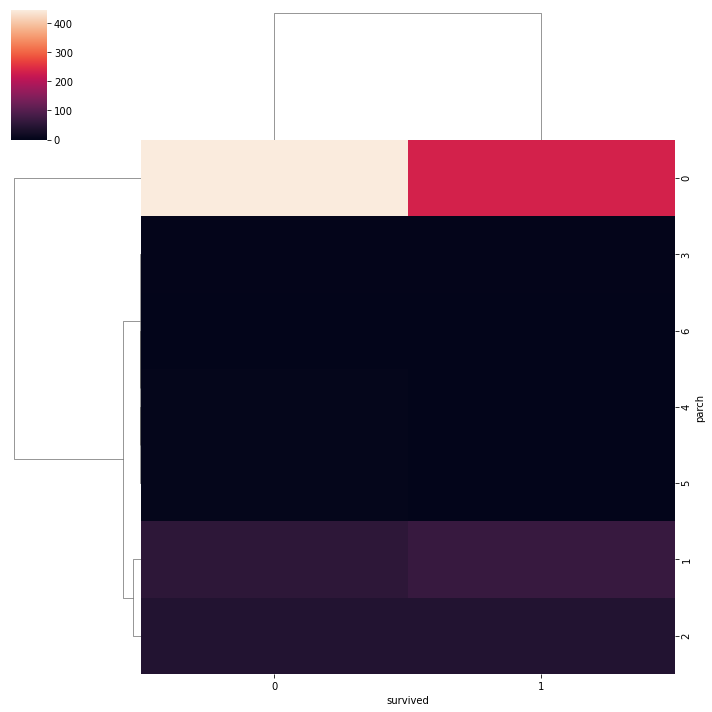

In [56]:
# 6. ClusterMap (Categorical - Categorical)
sns.clustermap(pd.crosstab(titanic['parch'],titanic['survived']))

In [57]:
# 7. Pairplot
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


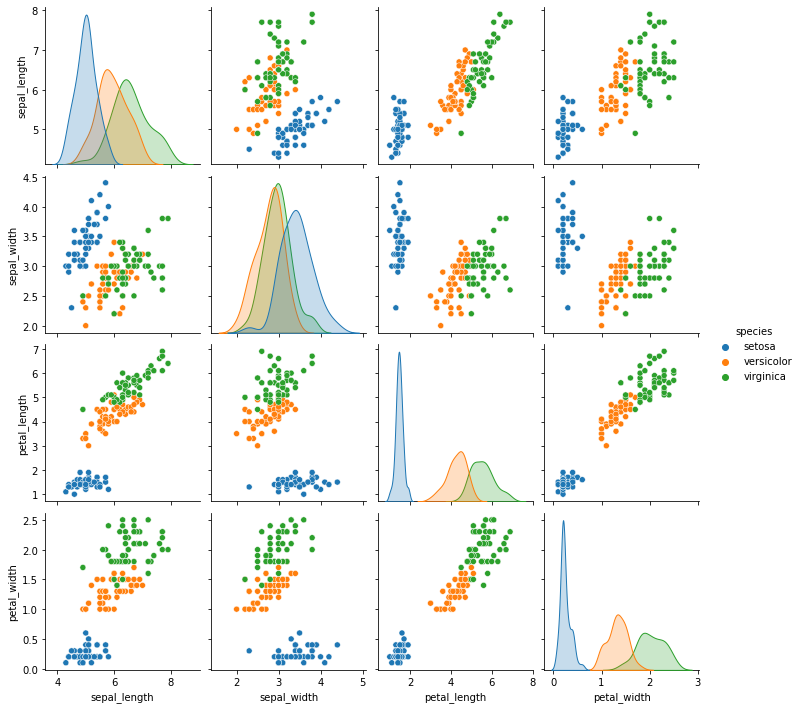

In [58]:
sns.pairplot(iris,hue='species')

In [59]:
# 8. Lineplot (Numerical - Numerical)
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [61]:
new = flights.groupby('year').sum().reset_index()

<AxesSubplot:xlabel='year', ylabel='passengers'>

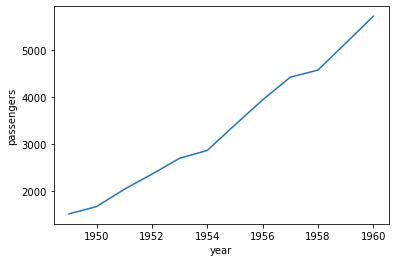

In [63]:
sns.lineplot(new['year'],new['passengers'])

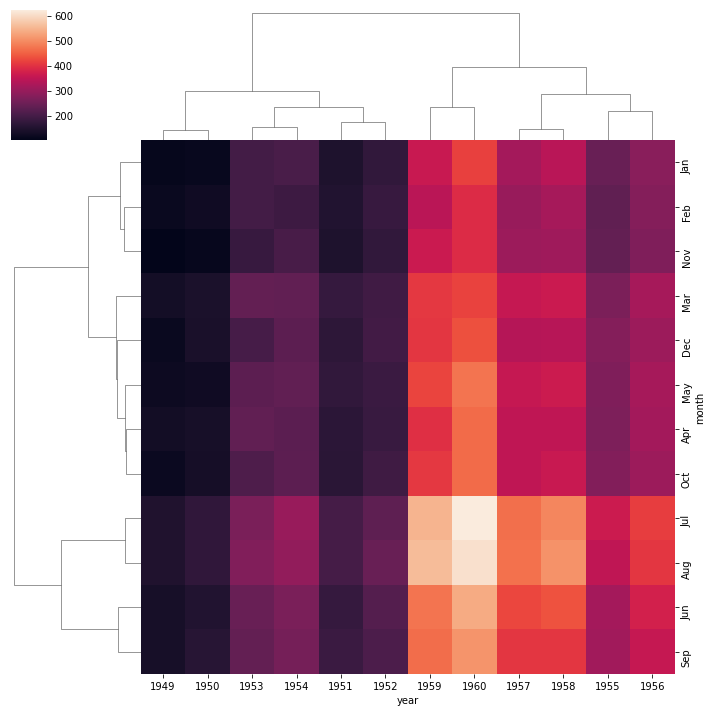

In [64]:
sns.clustermap(flights.pivot_table(values='passengers',index='month',columns='year'))